Lambda School Data Science

---

# Logistic Regression


## Assignment 🌯

Using a [**dataset of 400+ burrito reviews**](https://srcole.github.io/100burritos/), build a model that predicts whether a burrito is rated `'Great'`?

## What We Want

*Associate Instructor* is a teaching position where you will work closely students — delivering curriculum, and leading question and answer sessions. The purpose of this assignment is to give us an idea of how you approach data science problems and whether you can explain that approach to someone who does not yet have your level of expertise. Given this, we are less interested you building a "perfect" model and more focused on how you use this assignment to teach important concepts to a data science student.

## What You Need to Do

- [ ] Make a copy of this notebook to work on - you can download if you have a local Jupyter setup, or click `File > Save a copy in Drive` to copy and work on with Google Colab
- [ ] Import the burrito `csv` file into a `DataFrame`. Your target will be the `'Great'` column.
- [ ] Conduct exploratory data analysis (EDA) to determine how you should clean the data for your pipeline.
- [ ] Clean your data. (Note: You are not required to use all columns in your model, but justify your decisions based on your EDA.)
- [ ] Do train/validate/test split. Train on reviews from 2016 & earlier. Validate on 2017. Test on 2018 & later.
- [ ] Determine what the baseline accuracy is for a naïve classification model.
- [ ] Create a `scikit-learn` pipeline with the following components:
  - A one hot encoder for categorical features.
  - A scaler.
  - A logistic regressor.
- [ ] Train your model using the training data.
- [ ] Create a visualization showing your model's coefficients.
- [ ] Get your model's validation accuracy (multiple times if you try multiple iterations).
- [ ] Get your model's test accuracy (one time, at the end).

---

### Import the burrito `csv` file

In [23]:
# Import Data
import pandas as pd
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1cctPq1sYeD6Y6mGg5Lpl-GLDJBwtdihg', index_col=0)

In [24]:
df.shape

(421, 64)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421 entries, Donato's taco shop to Valentine's Mexican Food
Data columns (total 64 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Burrito         421 non-null    object 
 1   Date            421 non-null    object 
 2   Neighborhood    92 non-null     object 
 3   Address         88 non-null     object 
 4   URL             87 non-null     object 
 5   Yelp            87 non-null     float64
 6   Google          87 non-null     float64
 7   Chips           26 non-null     object 
 8   Cost            414 non-null    float64
 9   Hunger          418 non-null    float64
 10  Mass (g)        22 non-null     float64
 11  Density (g/mL)  22 non-null     float64
 12  Length          283 non-null    float64
 13  Circum          281 non-null    float64
 14  Volume          281 non-null    float64
 15  Tortilla        421 non-null    float64
 16  Temp            401 non-null    float64
 17  Me

In [26]:
df.describe()

,Yelp,Google,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Queso
count,87.000000,87.000000,414.000000,418.000000,22.000000,22.000000,283.000000,281.000000,281.000000,421.000000,401.000000,407.000000,418.000000,412.000000,419.000000,396.000000,419.000000,418.000000,0.0
mean,3.887356,4.167816,7.067343,3.495335,546.181818,0.675277,20.038233,22.135765,0.786477,3.519477,3.783042,3.620393,3.539833,3.586481,3.428998,3.371970,3.586993,3.979904,NaN
std,0.475396,0.373698,1.506742,0.812069,144.445619,0.080468,2.083518,1.779408,0.152531,0.794438,0.980338,0.829254,0.799549,0.997057,1.068794,0.924037,0.886807,1.118185,NaN
min,2.500000,2.900000,2.990000,0.500000,350.000000,0.560000,15.000000,17.000000,0.400000,1.000000,1.000000,1.000000,1.000000,0.500000,0.000000,0.000000,1.000000,0.000000,NaN
25%,3.500000,4.000000,6.250000,3.000000,450.000000,0.619485,18.500000,21.000000,0.680000,3.000000,3.000000,3.000000,3.000000,3.000000,2.600000,3.000000,3.000000,3.500000,NaN
50%,4.000000,4.200000,6.990000,3.500000,540.000000,0.658099,20.000000,22.000000,0.770000,3.500000,4.000000,3.800000,3.500000,4.000000,3.500000,3.500000,3.800000,4.000000,NaN
75%,4.000000,4.400000,7.880000,4.000000,595.000000,0.721726,21.500000,23.000000,0.880000,4.000000,4.500000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,NaN
max,4.500000,5.000000,25.000000,5.000000,925.000000,0.865672,26.000000,29.000000,1.540000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN


In [27]:
df.head()

,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,Hunger,...,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
Location,,,,,,,,,,,,,,,,,,,,,
Donato's taco shop,California,1/18/2016,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.2,NaN,6.49,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
Oscar's Mexican food,California,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.3,NaN,5.45,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
Oscar's Mexican food,Carnitas,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,4.85,1.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
Oscar's Mexican food,Carne asada,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,5.25,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
Pollos Maria,California,1/27/2016,Carlsbad,3055 Harding St,http://pollosmaria.com/,4.0,3.8,x,6.59,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421 entries, Donato's taco shop to Valentine's Mexican Food
Data columns (total 64 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Burrito         421 non-null    object 
 1   Date            421 non-null    object 
 2   Neighborhood    92 non-null     object 
 3   Address         88 non-null     object 
 4   URL             87 non-null     object 
 5   Yelp            87 non-null     float64
 6   Google          87 non-null     float64
 7   Chips           26 non-null     object 
 8   Cost            414 non-null    float64
 9   Hunger          418 non-null    float64
 10  Mass (g)        22 non-null     float64
 11  Density (g/mL)  22 non-null     float64
 12  Length          283 non-null    float64
 13  Circum          281 non-null    float64
 14  Volume          281 non-null    float64
 15  Tortilla        421 non-null    float64
 16  Temp            401 non-null    float64
 17  Me

In [29]:
df.head()

,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,Hunger,...,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
Location,,,,,,,,,,,,,,,,,,,,,
Donato's taco shop,California,1/18/2016,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.2,NaN,6.49,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
Oscar's Mexican food,California,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.3,NaN,5.45,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
Oscar's Mexican food,Carnitas,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,4.85,1.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
Oscar's Mexican food,Carne asada,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,5.25,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
Pollos Maria,California,1/27/2016,Carlsbad,3055 Harding St,http://pollosmaria.com/,4.0,3.8,x,6.59,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


### Conduct exploratory data analysis (EDA)

Check the shape of the dataset:

Check column names:

In [32]:
df.columns

Index(['Burrito', 'Date', 'Neighborhood', 'Address', 'URL', 'Yelp', 'Google',
       'Chips', 'Cost', 'Hunger', 'Mass (g)', 'Density (g/mL)', 'Length',
       'Circum', 'Volume', 'Tortilla', 'Temp', 'Meat', 'Fillings',
       'Meat:filling', 'Uniformity', 'Salsa', 'Synergy', 'Wrap', 'Reviewer',
       'Notes', 'Unreliable', 'NonSD', 'Beef', 'Pico', 'Guac', 'Cheese',
       'Fries', 'Sour cream', 'Pork', 'Chicken', 'Shrimp', 'Fish', 'Rice',
       'Beans', 'Lettuce', 'Tomato', 'Bell peper', 'Carrots', 'Cabbage',
       'Sauce', 'Salsa.1', 'Cilantro', 'Onion', 'Taquito', 'Pineapple', 'Ham',
       'Chile relleno', 'Nopales', 'Lobster', 'Queso', 'Egg', 'Mushroom',
       'Bacon', 'Sushi', 'Avocado', 'Corn', 'Zucchini', 'Great'],
      dtype='object')

Check if there are any missing values in the target column, 'Great':

In [33]:
df.Great.isnull().sum()

0

Check for balanced samples:

In [34]:
df.Great.replace({False: 0, True: 1}, inplace=True)

In [36]:
df.shape

(421, 64)

In [37]:
df.groupby(['Great']).count()

,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,Hunger,...,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
Great,,,,,,,,,,,,,,,,,,,,,
0,239,239,66,64,63,63,63,16,237,237,...,2,1,0,3,2,1,0,11,3,0
1,182,182,26,24,24,24,24,10,177,181,...,2,0,0,2,1,2,2,2,0,1


Visual representation of the target column: positive 'True' and negative 'False':

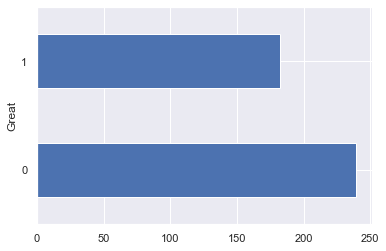

In [68]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
sns.set(rc={'figure.figsize':(18, 14)})
%matplotlib inline

df.groupby(['Great'])['Great'].count().plot(kind='barh')
plt.show()

Note, some features are categorical coded with 'X' or 'x':

In [ ]:
categorical = ['Beef', 'Pico', 'Guac', 'Cheese',
               'Fries', 'Sour cream', 'Pork', 'Chicken', 'Shrimp', 'Fish', 'Rice',
               'Beans', 'Lettuce', 'Tomato', 'Bell peper', 'Carrots', 'Cabbage',
               'Sauce', 'Salsa.1', 'Cilantro', 'Onion', 'Taquito', 'Pineapple', 'Ham',
               'Chile relleno', 'Nopales', 'Lobster', 'Queso', 'Egg', 'Mushroom',
               'Bacon', 'Sushi', 'Avocado', 'Corn', 'Zucchini']

Check features on ordinary scale (i.e. ratings), expected scale from 0 to 5:

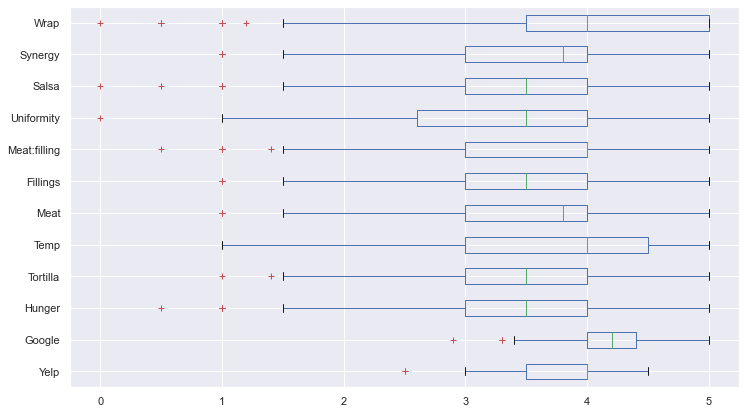

In [69]:
ordinal = ['Yelp', 'Google', 'Hunger', 'Tortilla', 
           'Temp', 'Meat', 'Fillings', 'Meat:filling', 
           'Uniformity', 'Salsa', 'Synergy', 'Wrap']

df[ordinal].plot(kind="box", vert=False, sym='r+')
plt.gcf().set_size_inches(12, 7)
plt.show()

Check continuous variables:

In [49]:
continuous = ['Cost', 'Mass (g)', 'Density (g/mL)', 
              'Length', 'Circum', 'Volume']

Two possible explanatory variables: `'Cost'` and `'Mass (g)'`

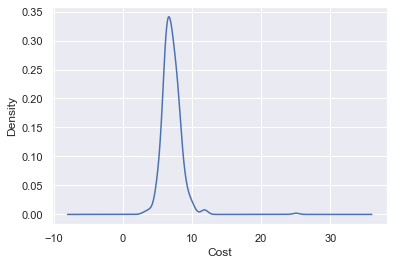

In [58]:
ax = df[continuous[0]].plot(kind='kde')
ax.set(xlabel=continuous[0])
plt.show()

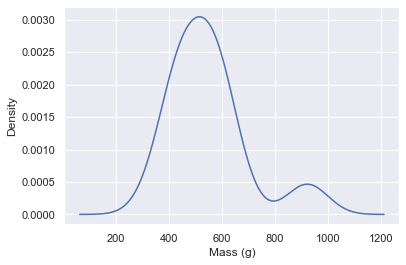

In [59]:
ax = df[continuous[1]].plot(kind='kde')
ax.set(xlabel=continuous[1])
plt.show()

Possible inputs for baseline Naive Classifier

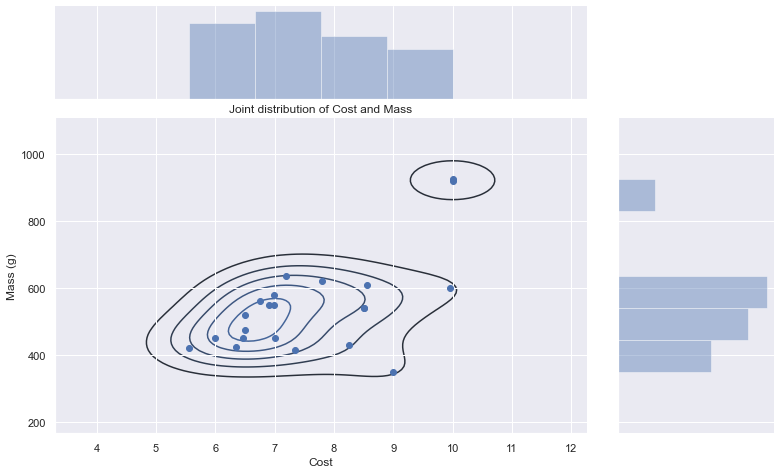

In [70]:
sns.jointplot(continuous[0], 
              continuous[1], 
              data=df,
              height=5, 
              ratio=3, 
              color="b"
             ).plot_joint(sns.kdeplot, zorder=0, n_levels=6)

plt.gcf().set_size_inches(12, 7)
plt.title("Joint distribution of Cost and Mass", fontsize=12)
plt.show()

### Clean data

In [77]:
#from datetime import datetime
df.Date = pd.to_datetime(df.Date)

### Do train/validate/test split

In [131]:
# Train on reviews from 2016 & earlier (expected 298 instances)
X_train = df.loc[df.Date < '2017']
y_train = X_train.pop('Great')

In [132]:
# Validate on 2017 (expected 85 instances)
X_validate = df.loc[(df.Date > '2017') & (df.Date < '2018')]
y_validate = X_validate.pop('Great')

In [133]:
# Test on 2018 & later (expected 38 instances)
X_test = df.loc[df.Date > '2018']
y_test = X_test.pop('Great')

### Determine baseline accuracy for a naïve classification model

? Naive Bayes ? Price and Volume?

### Create a `scikit-learn` pipeline

- A one hot encoder for categorical features.
- A scaler.
- A logistic regressor.

In [ ]:
# One hot encoding
df_nyc_onehot = pd.get_dummies(df_nyc_venues[['Venue Category']], prefix="", prefix_sep="")

# Add neighborhood column back to dataframe
df_nyc_onehot['Zip'] = df_nyc_venues['Zip'] 

# Move neighborhood column to the first column
fixed_columns = [df_nyc_onehot.columns[-1]] + list(df_nyc_onehot.columns[:-1])
df_nyc_onehot = df_nyc_onehot[fixed_columns]

df_nyc_onehot.head()

### Train model using training data

### Create visualization of model coefficients

### Get model's validation accuracy

### Get your model's test accuracy